In [1]:
#Ok, here I am going to try and use the fraction of clustered colors for different number of clusters to build some models
#and see how well they can classify...

In [2]:
#First, I plan on showing a few reconstructed images based on different number of colors clustered.

In [3]:
#I used getData.py to get the color fraction clusters

In [6]:
from sklearn.cluster import KMeans

In [1]:
#load images
import numpy as np
import glob
from PIL import Image

def load_img(imfile):
    img = Image.open(imfile)
    img.load()
    return np.asarray(img, dtype="int32")

host_dir = "kaggle/cell_images/"
uninfected = glob.glob(host_dir + "Uninfected/*.png")
parasitized = glob.glob(host_dir + "Parasitized/*.png")

u0 = load_img(uninfected[0])
p0 = load_img(parasitized[0])

In [7]:
def plot_img_from_arr(imarr):
    
    shp = imarr.shape
    x=[]
    y=[]
    c=[]
    
    for i in range(0, shp[0]):
        for j in range(0, shp[1]):
            x.append(i)
            y.append(j)
            c.append(np.true_divide(imarr[i][j], 255))
    plt.scatter(x,y,c=c)

In [3]:
def load_img_from_arr(imarr):
    
    shp = imarr.shape
    x=[]
    y=[]
    c=[]
    
    for i in range(0, shp[0]):
        for j in range(0, shp[1]):
            x.append(i)
            y.append(j)
            c.append(np.true_divide(imarr[i][j], 255))
    return x,y,c

In [10]:
import matplotlib.pyplot as plt

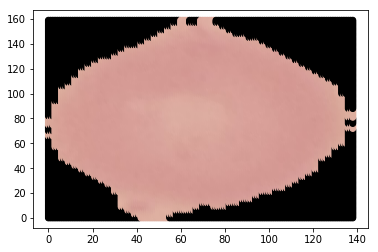

In [19]:
plot_img_from_arr(u0)

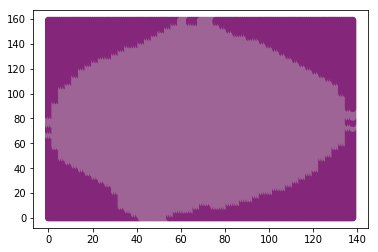

In [37]:
plot_img_from_arr(np.load("test/uninfected_0_reconstructed_3colors.npy"))

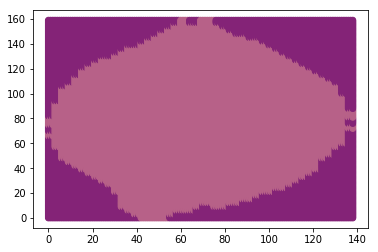

In [38]:
plot_img_from_arr(np.load("test/uninfected_0_reconstructed_4colors.npy"))

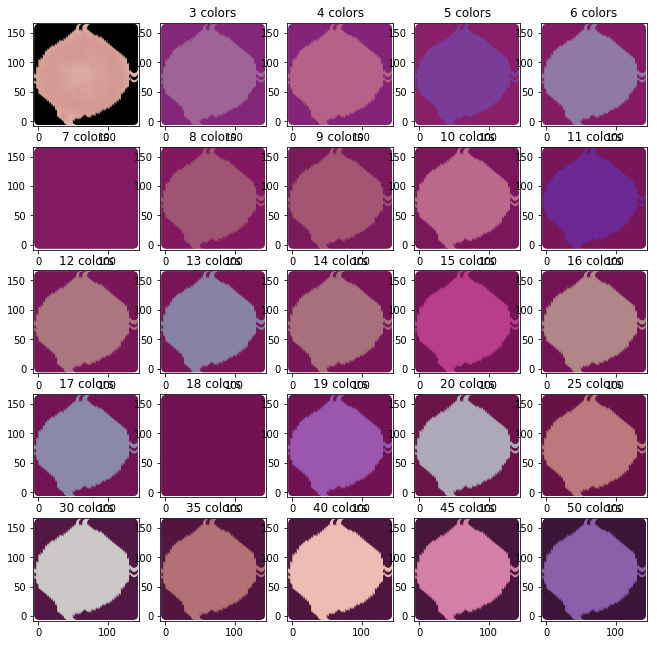

In [51]:
plt.figure(figsize=(11,11))
ks = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]
plt.subplot(5,5,1)
x,y,c = load_img_from_arr(u0)
plt.scatter(x,y,c=c)
for i in range(1, len(ks)+1):
    x,y,c = load_img_from_arr(np.load("test/uninfected_0_reconstructed_" + str(ks[i-1]) + "colors.npy"))

    plt.subplot(5, 5, i+1)
    plt.scatter(x,y,c=c)
    plt.title(str(ks[i-1]) + " colors")

plt.show()

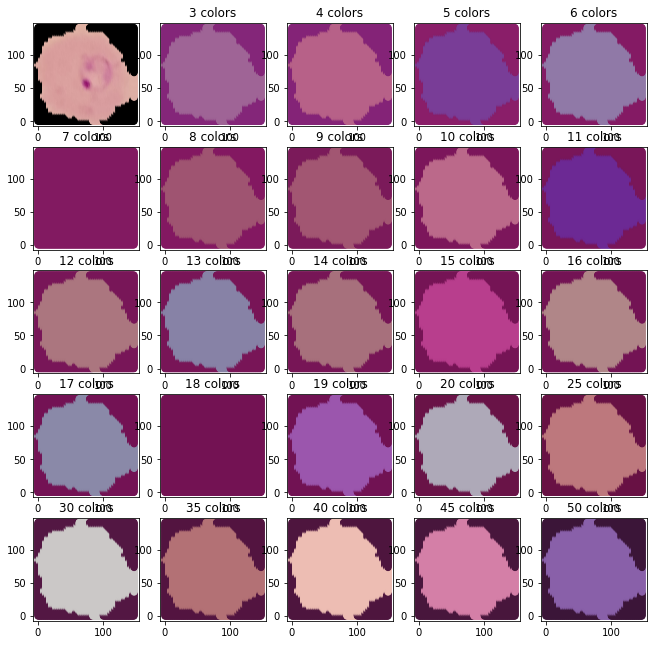

In [52]:
plt.figure(figsize=(11,11))
ks = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]
plt.subplot(5,5,1)
x,y,c = load_img_from_arr(p0)
plt.scatter(x,y,c=c)
for i in range(1, len(ks)+1):
    x,y,c = load_img_from_arr(np.load("test/parasitized_0_reconstructed_" + str(ks[i-1]) + "colors.npy"))

    plt.subplot(5, 5, i+1)
    plt.scatter(x,y,c=c)
    plt.title(str(ks[i-1]) + " colors")

plt.show()

In [61]:
def plot_reconstructed_ims(origIm, u_p, imNum):
    plt.figure(figsize=(11,11))
    ks = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]
    plt.subplot(5,5,1)
    x,y,c = load_img_from_arr(origIm)
    plt.scatter(x,y,c=c)
    for i in range(1, len(ks)+1):
        #print("im " + str(i))
        x,y,c = load_img_from_arr(np.load("test/" + ("parasitized" if u_p == "p" else "uninfected") + "_" + str(imNum) + "_reconstructed_" + str(ks[i-1]) + "colors.npy"))

        plt.subplot(5, 5, i+1)
        plt.scatter(x,y,c=c)
        plt.title(str(ks[i-1]) + " colors")

plt.show()

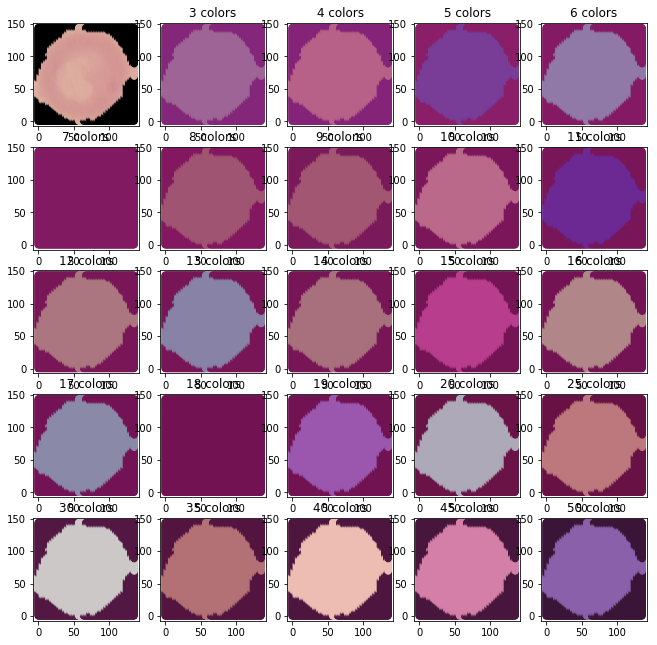

In [63]:
plot_reconstructed_ims(load_img(uninfected[1]), "u", 1)

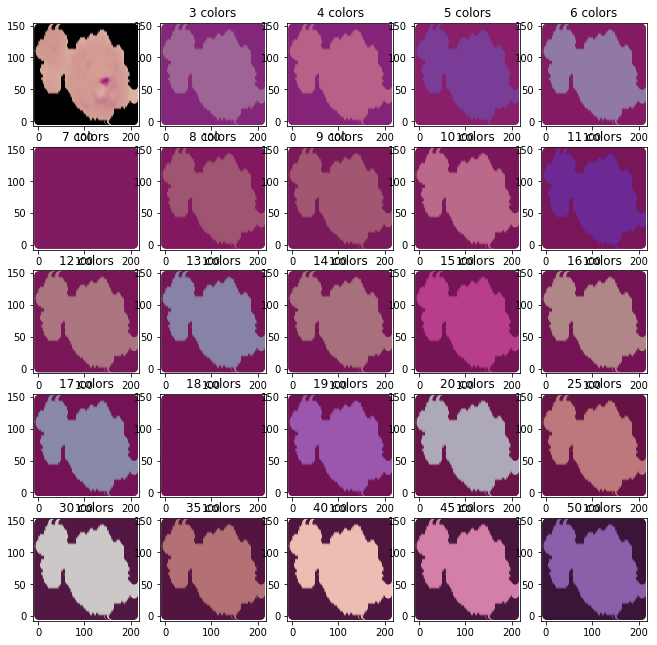

In [64]:
plot_reconstructed_ims(load_img(parasitized[1]), "p", 1)

In [28]:
cluster_centers = np.loadtxt(host_dir + str(50) + "colorClusters.txt")

In [25]:
cluster_centers

array([[130.20075469,  26.70391983,  97.00643339],
       [162.22605858, 146.66366057, 179.12640642],
       [211.73333071, 181.53719138, 182.1035147 ],
       [133.71288202,  99.94517856, 154.54106526],
       [170.27769927,  62.12706504, 129.62792302],
       [116.18893736,  44.07177778, 150.861158  ],
       [194.47675477, 120.53477415, 145.08471793]])

In [26]:
#takes a np array and prints the colors
def printColors(fit):
    from colr import color
    s = """          """#dummy block
    string = ""
    for i, c in enumerate(fit):
        string += color(s, back=(c[0], c[1], c[2]))
        #print(color(s, back=(c[0], c[1], c[2])))
        if (i+1)%5==0:
            string += "\n"
    print(string)
def printColor(c):
    s = """          """#dummy block
    print(color(s, back=(c[0], c[1], c[2])))

In [29]:
printColors(cluster_centers)

In [30]:
#reconstructedImage
u0R = np.load("test/uninfected_0_reconstructed_50colors.npy")
p0R = np.load("test/parasitized_0_reconstructed_50colors.npy")

In [32]:
np.unique(u0R)

array([ 0, 26, 30, 53], dtype=int32)

In [33]:
np.unique(p0R)

array([ 0, 26, 30, 53], dtype=int32)

In [48]:
cluster_centers[48]

array([59.28349179, 21.80985307, 56.70786517])

In [65]:
#Well, it's beginning to look like I didn't actually capture what I wanted to with my color clustering.
#I may have to take the probability of a color into account also somehow.

In [66]:
#Ok, well, I might have to do this slightly differently...for a given image, I think using appx 7 colors still does the
#job...but the problem is that there is too much variation among the images that I can't use this coarse of a cutoff
#for all the images
#if I did a clustering on all of the images separately, that would define each image well hopefully...let's just verify
#that part real quick

In [96]:
data = load_img(parasitized[0])
shp = data.shape
data = data.reshape(shp[0]*shp[1],3)
fit = KMeans(n_clusters=7).fit(data)

In [72]:
fit.cluster_centers_

array([[2.17683384e+02, 1.58456522e+02, 1.58831808e+02],
       [2.44133232e-02, 1.89250569e-04, 1.66540500e-02]])

In [74]:
fit.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [97]:
cR = data[:,0]
cG = data[:,1]
cB = data[:,2]

In [73]:
import colorFracs_v3

In [98]:
p0R = colorFracs_v3.colorFrac(load_img(parasitized[0]), fit.cluster_centers_, cR, cG, cB, fit.labels_, 7, True)

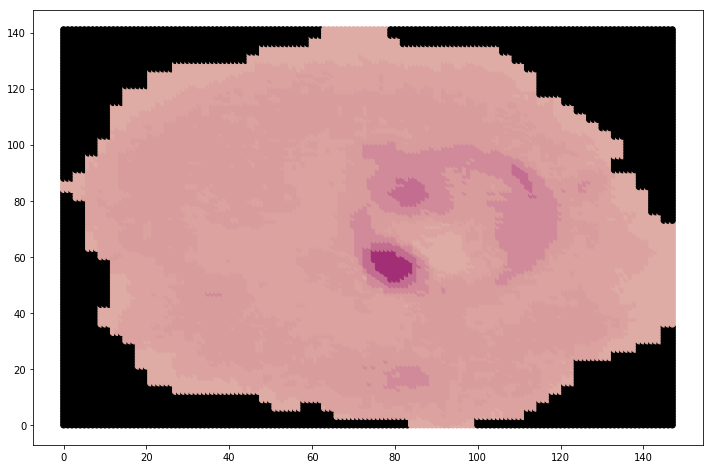

In [99]:
plot_img_from_arr(p0R)

In [101]:
#ok, let's show for one image..then try again the whole thing using this approach

getting data for 3 clusters
getting data for 4 clusters
getting data for 5 clusters
getting data for 6 clusters
getting data for 7 clusters
getting data for 8 clusters
getting data for 9 clusters
getting data for 10 clusters
getting data for 11 clusters
getting data for 12 clusters
getting data for 13 clusters
getting data for 14 clusters
getting data for 15 clusters
getting data for 16 clusters
getting data for 17 clusters
getting data for 18 clusters
getting data for 19 clusters
getting data for 20 clusters
getting data for 25 clusters
getting data for 30 clusters
getting data for 35 clusters
getting data for 40 clusters
getting data for 45 clusters
getting data for 50 clusters


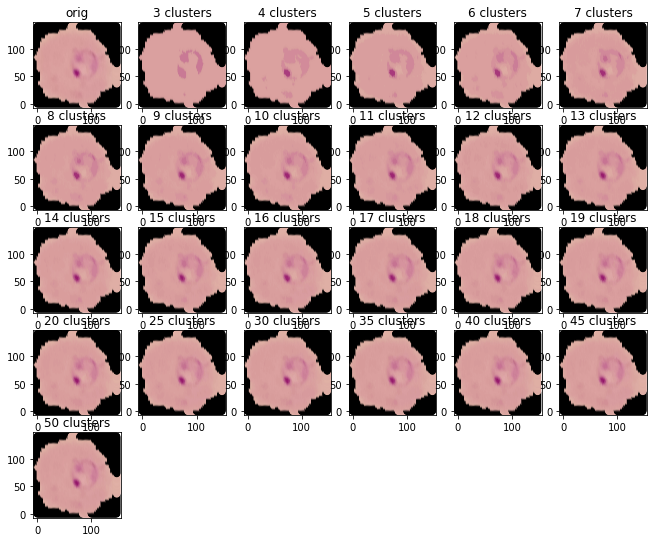

In [105]:
data = load_img(parasitized[0])
arrs = []
labels = []
arrs.append(data)
labels.append("orig")
shp = data.shape
data = data.reshape(shp[0]*shp[1],3)
cR = data[:,0]
cG = data[:,1]
cB = data[:,2]
ks = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]
for k in ks:
    print("getting data for " + str(k) + " clusters")
    fit = KMeans(n_clusters=k).fit(data)
    arrs.append(colorFracs_v3.colorFrac(load_img(parasitized[0]), fit.cluster_centers_, cR, cG, cB, fit.labels_, k, True))
    labels.append(str(k) + " clusters")
plot_arrs(arrs, labels)

In [102]:
def nextSquare(n):
    i=1
    while True:
        if i*i > n:
            return i
        else:
            i += 1

In [103]:
def plot_arrs(arrs, labels):
    plt.figure(figsize=(11,11))
    sqr = nextSquare(len(arrs))
    for i in range(1, len(arrs)+1):
        #print("im " + str(i))
        x,y,c = load_img_from_arr(arrs[i-1])
        plt.subplot(sqr, sqr, i)
        plt.scatter(x,y,c=c)
        plt.title(labels[i-1])
plt.show()

In [108]:
def plot_clustered_ims(img):
    data = load_img(img)
    arrs = []
    labels = []
    arrs.append(data)
    labels.append("orig")
    shp = data.shape
    data = data.reshape(shp[0]*shp[1],3)
    cR = data[:,0]
    cG = data[:,1]
    cB = data[:,2]
    ks = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]
    for k in ks:
        print("getting data for " + str(k) + " clusters")
        fit = KMeans(n_clusters=k).fit(data)
        arrs.append(colorFracs_v3.colorFrac(load_img(img), fit.cluster_centers_, cR, cG, cB, fit.labels_, k, True))
        labels.append(str(k) + " clusters")
    plot_arrs(arrs, labels)

getting data for 3 clusters
getting data for 4 clusters
getting data for 5 clusters
getting data for 6 clusters
getting data for 7 clusters
getting data for 8 clusters
getting data for 9 clusters
getting data for 10 clusters
getting data for 11 clusters
getting data for 12 clusters
getting data for 13 clusters
getting data for 14 clusters
getting data for 15 clusters
getting data for 16 clusters
getting data for 17 clusters
getting data for 18 clusters
getting data for 19 clusters
getting data for 20 clusters
getting data for 25 clusters
getting data for 30 clusters
getting data for 35 clusters
getting data for 40 clusters
getting data for 45 clusters
getting data for 50 clusters


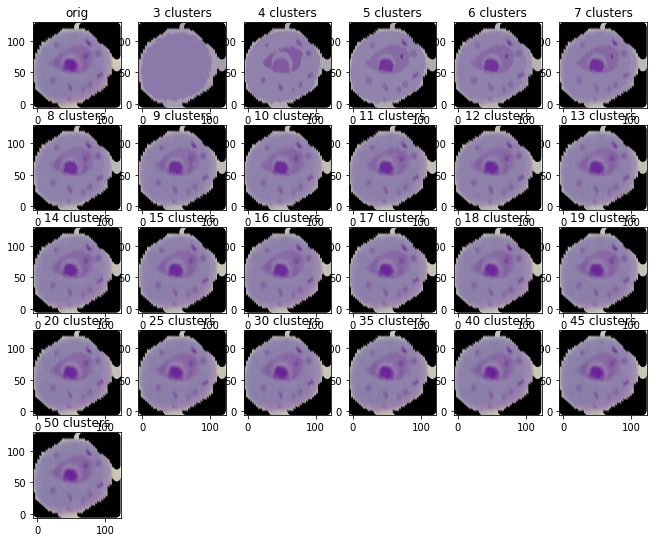

In [121]:
plot_clustered_ims(parasitized[4500])

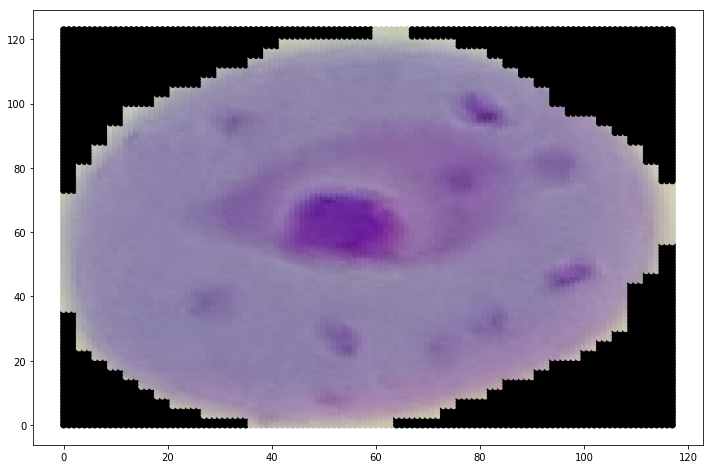

In [9]:
import os
out_dir = "out_data_clustering_v2/"
os.system("mkdir out_data_clustering_v2")
def cluster_imgs():
    ks = [11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]
    for k in ks:
        print("k=" + str(k))
        inertia = np.zeros(len(uninfected) + len(parasitized))
        print("parasitized images")
        for dex, im in enumerate(parasitized):
            if dex%100 == 0:
                print(dex)
            i = load_img(im)
            ishp = i.shape
            i = i.reshape(ishp[0]*ishp[1],3)
            fit = KMeans(n_clusters = k).fit(i)
            np.save(out_dir + "k_" + str(k) + "_centers_p" + str(dex) + ".npy", fit.cluster_centers_)
            np.save(out_dir + "k_" + str(k) + "_labels_p_" + str(dex) + ".npy", fit.labels_)
            inertia[dex] = fit.inertia_
        print("uninfected images")
        for dex, im in enumerate(uninfected):
            if dex%100 == 0:
                print(dex)
            i = load_img(im)
            ishp = i.shape
            i = i.reshape(ishp[0]*ishp[1],3)
            fit = KMeans(n_clusters = k).fit(i)
            np.save(out_dir + "k_" + str(k) + "_centers_u" + str(dex) + ".npy", fit.cluster_centers_)
            np.save(out_dir + "k_" + str(k) + "_labels_u_" + str(dex) + ".npy", fit.labels_)
            inertia[dex] = fit.inertia_
        np.save(out_dir + "k_" + str(k) + "inertia.npy", inertia)

In [10]:
cluster_imgs()

k=11
parasitized images
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
uninfected images
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000

1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
k=17
parasitized images
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700


3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
uninfected images
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8

In [ ]:
#Ok, so basically what I am hoping to do here is to reduce the number of colors in a given image to only like 7 colors and
#then on those images with CG'd colors, try either my clustering analysis on all the images together rather than separately.
#Basically it seems I might have to CG out the extra colors a bit more slowly in order to retain all of the relevant
#information.

5

In [8]:
5

5

In [1]:
#

In [2]:
#

In [3]:
#

In [4]:
#

In [5]:
#Let's try this again but on subset of data

In [18]:
import numpy as np
import glob
from PIL import Image

def load_img(imfile):
    img = Image.open(imfile)
    img.load()
    return np.asarray(img, dtype="int32")

host_dir = "subData/"
uninfected = glob.glob(host_dir + "uninfected/*.png")
parasitized = glob.glob(host_dir + "parasitized/*.png")

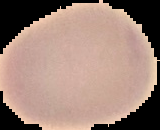

In [15]:
#plot_img_from_arr(load_img(uninfected[0]))
Image.open(uninfected[0])

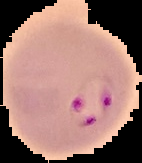

In [16]:
Image.open(parasitized[0])

In [19]:
import pandas as pd

#extend previous code to get the colors in each image
pNColors = np.zeros(len(uninfected))
uNColors = np.zeros(len(parasitized))

i = load_img(parasitized[0])
ishp = i.shape
p_df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()
i = load_img(uninfected[0])
ishp = i.shape
u_df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()

pdfs = []
udfs = []
for dex, im in enumerate(parasitized):
    i = load_img(im)
    ishp = i.shape
    df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3))#.drop_duplicates()
    #p_df = pd.concat([p_df, df])
    pdfs.append(df)
    pNColors[dex] = len(df.index)#gets # of colors in image
#pColors = p_df.drop_duplicates().to_numpy()

for dex, im in enumerate(uninfected):
    i = load_img(im)
    ishp = i.shape
    df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3))#.drop_duplicates()
    #u_df = pd.concat([u_df, df])
    udfs.append(df)
    uNColors[dex] = len(df.index)#gets # of colors in image
#uColors = u_df.drop_duplicate().to_numpy()
#u_df = np.concatenate(([el.drop_duplicates().to_numpy() for el in udfs]))
#p_df = np.concatenate(([el.drop_duplicates().to_numpy() for el in pdfs]))
u_df = np.concatenate(([el.to_numpy() for el in udfs]))
p_df = np.concatenate(([el.to_numpy() for el in pdfs]))
allColors = np.concatenate(([u_df,p_df]))
print(allColors.shape)

(36493637, 3)


In [20]:
allColors = pd.DataFrame(allColors).drop_duplicates().to_numpy()
print(allColors.shape)
allColors = np.unique(allColors, axis=1)
print(allColors.shape)

(117375, 3)
(117375, 3)


In [23]:
from sklearn.cluster import KMeans

fits = []
ks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,65,80,100]
for k in ks:
    print(k)
    fits.append(KMeans(n_clusters=k).fit(allColors))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
20
25
30
35
40
45
50
65
80
100


In [24]:
inertia = []
for i in range(0, len(ks)):
    inertia.append(fits[i].inertia_)

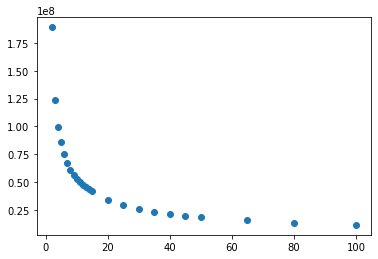

In [25]:
plt.scatter(ks,inertia)

In [26]:
outdir="subData/clusteredColors/"
for i, k in enumerate(ks):
    np.save("clusterCenters_" + str(k) + ".npy", fits[i].cluster_centers_)
    np.save("clusterLabeks_" + str(k) + ".npy", fits[i].labels_)

In [27]:
def load_img_from_arr(imarr):
    
    shp = imarr.shape
    x=[]
    y=[]
    c=[]
    
    for i in range(0, shp[0]):
        for j in range(0, shp[1]):
            x.append(i)
            y.append(j)
            c.append(np.true_divide(imarr[i][j], 255))
    return x,y,c

def nextSquare(n):
    i=1
    while True:
        if i*i > n:
            return i
        else:
            i += 1
            
def plot_arrs(arrs, labels):
    plt.figure(figsize=(11,11))
    sqr = nextSquare(len(arrs))
    for i in range(0, len(arrs)):
        print("im " + str(i))
        x,y,c = load_img_from_arr(arrs[i])
        plt.subplot(sqr, sqr, i+1)
        plt.scatter(x,y,c=c)
        plt.title(labels[i])
    plt.show()

In [282]:
import colorFracs_v4
def plot_clustered_ims(img, ks):
    im = load_img(img)
    shp = im.shape
    arrs = np.zeros(shape=(len(fits)+1,shp[0],shp[1],3))
    labels = []
    arrs[0] = im
    labels.append("orig") 
    data = im.reshape(shp[0]*shp[1],3)
    cR = data[:,0]
    cG = data[:,1]
    cB = data[:,2]
    for i, k in enumerate(ks):
        fit_labels = np.load("subData/clusterLabeks_" + str(k) + ".npy")
        fit_centers = np.load("subData/clusterCenters_" + str(k) + ".npy")
        data1 = colorFracs_v4.colorFrac(im, fit_centers, cR, cG, cB, fit_labels, k, 2)[1]
        arrs[i+1] = data1
        labels.append("k=" + str(k))
    plot_arrs(arrs, labels)

im 0
im 1
im 2
im 3
im 4
im 5
im 6
im 7
im 8
im 9
im 10
im 11
im 12
im 13
im 14
im 15
im 16
im 17
im 18
im 19
im 20
im 21
im 22
im 23
im 24


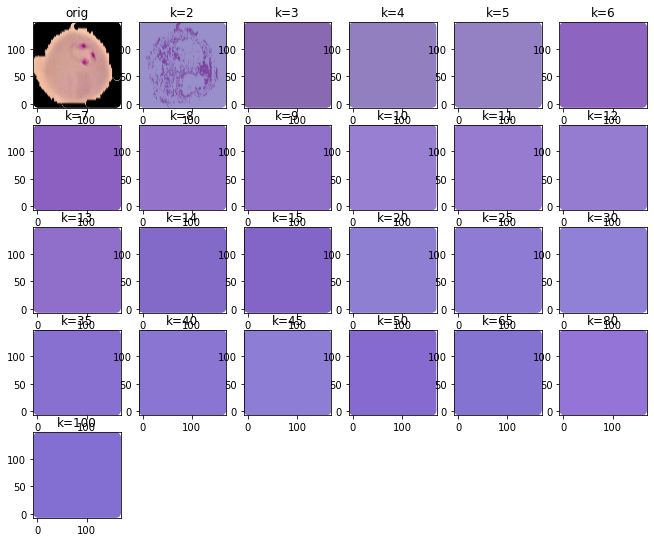

In [34]:
plot_clustered_ims(parasitized[0],ks)

In [32]:
len(labels)

NameError: name 'labels' is not defined

In [231]:
from sklearn.cluster import DBSCAN
fit = DBSCAN(eps=1.732050807569,min_samples=5).fit(allColors)
pred = DBSCAN(eps=1.732050807569,min_samples=5).fit_predict(allColors)

In [230]:
collections.Counter(fit.labels_)

Counter({-1: 16834,
         0: 94886,
         140: 3,
         1: 5,
         2: 5,
         20: 8,
         3: 9,
         19: 17,
         4: 11,
         219: 2,
         5: 5,
         6: 6,
         7: 8,
         8: 17,
         9: 3,
         10: 5,
         13: 4,
         11: 9,
         12: 5,
         14: 102,
         15: 6,
         57: 5,
         16: 4,
         143: 7,
         17: 9,
         161: 4,
         218: 2,
         217: 5,
         18: 2,
         149: 5,
         721: 3,
         21: 13,
         735: 5,
         83: 9,
         24: 6,
         22: 11,
         23: 11,
         27: 5,
         25: 7,
         26: 6,
         731: 7,
         28: 3,
         776: 3,
         353: 5,
         29: 5,
         51: 4,
         195: 11,
         30: 4,
         223: 5,
         168: 3,
         31: 16,
         32: 5,
         33: 10,
         490: 5,
         34: 7,
         36: 3,
         35: 8,
         37: 4,
         271: 5,
         38: 35,
         726:

In [37]:
import collections

In [51]:
allColors

array([[  0,   0,   0],
       [186, 211, 251],
       [183, 208, 248],
       ...,
       [106,  61, 154],
       [ 96,  44, 144],
       [119,  62, 167]], dtype=int32)

In [52]:
from sklearn.decomposition import PCA
p1 = PCA(n_components=1).fit(allColors)
p2 = PCA(n_components=2).fit(allColors)
p3 = PCA(n_components=3).fit(allColors)
#plt.hist2d()

In [53]:
p2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
p3 = p3.fit_transform(allColors)

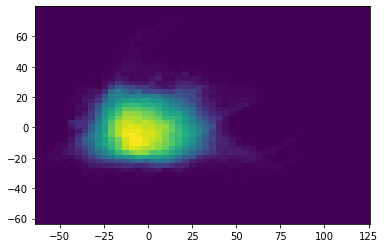

In [64]:
plt.hist2d(p3[:,1],p3[:,2],bins=50)
plt.show()

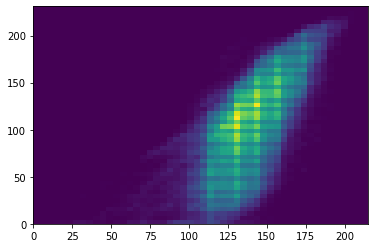

In [66]:
plt.hist2d(allColors[:,0],allColors[:,1],bins=50)
plt.show()

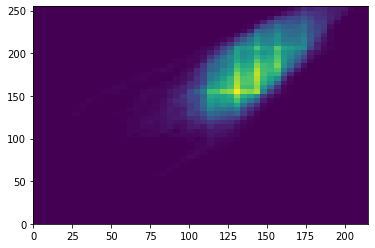

In [67]:
plt.hist2d(allColors[:,0],allColors[:,2],bins=50)
plt.show()

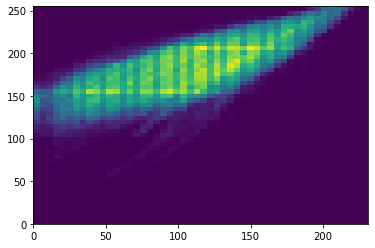

In [68]:
plt.hist2d(allColors[:,1],allColors[:,2],bins=50)
plt.show()

In [69]:
hist = np.histogramdd(allColors,bins=30)

In [77]:
hist[0].shape

(30, 30, 30)

In [79]:
hist=hist[0]

In [80]:
hist

array([[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [85]:
newhist = np.zeros(shape=(30,30,30,4))
for i in range(0, 30):
    for j in range(0, 30):
        for k in range(0, 30):
            newhist[i][j][k][0] = i
            newhist[i][j][k][1] = j
            newhist[i][j][k][2] = k
            newhist[i][j][k][3] = hist[i][j][k]

In [86]:
newhist

array([[[[ 0.,  0.,  0.,  1.],
         [ 0.,  0.,  1.,  0.],
         [ 0.,  0.,  2.,  0.],
         ...,
         [ 0.,  0., 27.,  0.],
         [ 0.,  0., 28.,  0.],
         [ 0.,  0., 29.,  0.]],

        [[ 0.,  1.,  0.,  0.],
         [ 0.,  1.,  1.,  0.],
         [ 0.,  1.,  2.,  0.],
         ...,
         [ 0.,  1., 27.,  0.],
         [ 0.,  1., 28.,  0.],
         [ 0.,  1., 29.,  0.]],

        [[ 0.,  2.,  0.,  0.],
         [ 0.,  2.,  1.,  0.],
         [ 0.,  2.,  2.,  0.],
         ...,
         [ 0.,  2., 27.,  0.],
         [ 0.,  2., 28.,  0.],
         [ 0.,  2., 29.,  0.]],

        ...,

        [[ 0., 27.,  0.,  0.],
         [ 0., 27.,  1.,  0.],
         [ 0., 27.,  2.,  0.],
         ...,
         [ 0., 27., 27.,  0.],
         [ 0., 27., 28.,  0.],
         [ 0., 27., 29.,  0.]],

        [[ 0., 28.,  0.,  0.],
         [ 0., 28.,  1.,  0.],
         [ 0., 28.,  2.,  0.],
         ...,
         [ 0., 28., 27.,  0.],
         [ 0., 28., 28.,  0.],
         

In [94]:
newhist=newhist.reshape(30*30*30,4)

In [95]:
newhist

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  2.,  0.],
       ...,
       [29., 29., 27.,  0.],
       [29., 29., 28.,  0.],
       [29., 29., 29.,  0.]])

In [101]:
X,Y = np.meshgrid(newhist[:,0],newhist[:,1])
#Y,Z = np.meshgrid(newhist[:,1],newhist[:,2])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface(X, Y, Z, *args, **kwargs)

In [103]:
Y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [29., 29., 29., ..., 29., 29., 29.],
       [29., 29., 29., ..., 29., 29., 29.],
       [29., 29., 29., ..., 29., 29., 29.]])

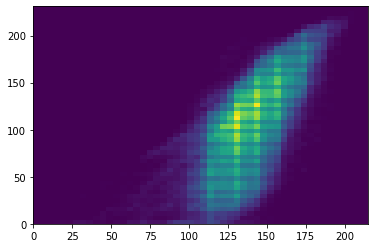

In [110]:
plt.hist2d(allColors[:,0],allColors[:,1],bins=50)
plt.show()

In [115]:
from sklearn.cluster import MeanShift
fit = MeanShift().fit(allColors)

KeyboardInterrupt: 

In [233]:
np.unique(pred)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [258]:
colors=np.zeros(shape=(778,3))
cts=np.zeros(778)
for i, color in enumerate(allColors):
    p = pred[i] + 1
    cts[p] += 1
    colors[p][0] += color[0]
    colors[p][1] += color[1]
    colors[p][2] += color[2]
for i in range(0, len(cts)):
    colors[i]/=cts[i]


In [259]:
colors

array([[124.23850541,  72.39337056, 160.19900202],
       [142.52029804, 111.0105495 , 184.95614738],
       [170.8       , 204.4       , 230.        ],
       ...,
       [ 96.2       ,  39.6       , 138.2       ],
       [ 98.8       ,  28.4       , 131.        ],
       [114.33333333,  65.33333333, 174.        ]])

In [264]:
colors = colors[np.lexsort((colors[:,0],colors[:,1],colors[:,2]))]

In [274]:
from colr import color

In [271]:
from colr import color
s = """          """#dummy block
c=0
while c < len(colors):
    t=color("",back=(0,0,0))
    for i in range(0, 12):
        t+=color(s, back=(colors[c][0], colors[c][1], colors[c][2]))
        c += 1
        if c == len(colors):
            break
    print(t)

In [276]:
eps=1.2
min_samples=5

fit = DBSCAN(eps=eps,min_samples=min_samples).fit(allColors)
pred = DBSCAN(eps=eps,min_samples=min_samples).fit_predict(allColors)
nLabels = len(np.unique(pred))
colors=np.zeros(shape=(nLabels,3))
cts=np.zeros(nLabels)
for i, col in enumerate(allColors):
    p = pred[i] + 1
    cts[p] += 1
    colors[p][0] += col[0]
    colors[p][1] += col[1]
    colors[p][2] += col[2]
for i in range(0, len(cts)):
    colors[i]/=cts[i]
s = """          """#dummy block
c=0
colors = colors[np.lexsort((colors[:,0],colors[:,1],colors[:,2]))]
while c < len(colors):
    t=color("",back=(0,0,0))
    for i in range(0, 12):
        t+=color(s, back=(colors[c][0], colors[c][1], colors[c][2]))
        c += 1
        if c == len(colors):
            break
    print(t)

In [277]:
fits.append(KMeans(n_clusters=1000).fit(allColors))

im 0
im 1
im 2
im 3


IndexError: list index out of range

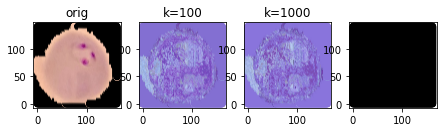

In [284]:
ks=[100,1000]
np.save("subData/clusterCenters_" + str(1000) + ".npy", fits[len(fits)-1].cluster_centers_)
np.save("subData/clusterLabeks_" + str(1000) + ".npy", fits[len(fits)-1].labels_)
plot_clustered_ims(parasitized[0],ks)

In [285]:
fits.append(KMeans(n_clusters=10000).fit(allColors))

im 0
im 1
im 2
im 3


IndexError: list index out of range

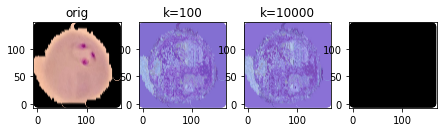

In [289]:
ks=[100,10000]
np.save("subData/clusterCenters_" + str(10000) + ".npy", fits[len(fits)-1].cluster_centers_)
np.save("subData/clusterLabeks_" + str(10000) + ".npy", fits[len(fits)-1].labels_)
plot_clustered_ims(parasitized[0],ks)